<a href="https://www.kaggle.com/code/game1g/rul-nasa-turbofan-jet-engine?scriptVersionId=223034658" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **🔹 專案大綱**

## **📌 什麼是 RUL（剩餘壽命）？**
RUL 是指一個設備或零件**在完全失效（壞掉）之前**，還能夠運作的時間長度。例如：
- **電動車電池**：還能用多久？  
- **工業機械設備**：何時需要維修？  
- **渦輪引擎 / 發電機**：多久後會故障？  
---

## **📌 RUL 預測的應用場景**
1. **智慧製造（Smart Manufacturing）**
   - 監測生產設備，提前維修，降低維修成本。
   - 例如：工廠中的機械手臂、CNC 機台、電動馬達等。

2. **電動車（EV）**
   - 預測電池健康狀態，提升續航能力。
   - 例如：電動巴士、電動車的電池模組壽命管理。

3. **航空航太（Aerospace）**
   - 監測飛機渦輪引擎，確保安全飛行。
   - 例如：NASA C-MAPSS 數據集，就是用來預測飛機引擎剩餘壽命。

---

## **📌 RUL 預測的方法**
1. **機器學習（ML）**
   - 適合有大量已標註 RUL 數據的情況，例如：
     - **Random Forest**
     - **XGBoost**
     - **SVR（Support Vector Regression）**

2. **深度學習（DL）**
   - 適合處理**時間序列數據**（即，設備狀態隨時間變化），例如：
     - **LSTM（長短期記憶網路）**
     - **CNN（卷積神經網路）**
     - **Transformer（自注意力機制）**

---


# **🔹  使用kaggle數據集**
[NASA Turbofan Jet Engine Data Set]https://www.kaggle.com/datasets/behrad3d/nasa-cmaps)

---

# **🔹 技術棧**  
- **數據處理**：`pandas`、`numpy`、`scikit-learn`  
- **機器學習**：`RandomForestRegressor`（隨機森林）  
- **深度學習**：`PyTorch / TensorFlow`（CNN）  
- **模型部署**：`Flask` / `FastAPI`  

---


# **🔹  專案詳細步驟**
## **1️ 數據處理**
📌 **目標**：將原始 `.txt` 檔案轉換為適用於模型訓練的 DataFrame  

🔹 **步驟**
1. 讀取 **`train_FD001.txt`** 和 **`test_FD001.txt`**  
2. 讀取 RUL 標籤 **`RUL_FD001.txt`**  
3. 清理數據（刪除空白列）  
4. 添加 RUL 標籤  

📌 **程式碼**


In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# 讀取數據
train_path = "/kaggle/input/nasa-cmaps/CMaps/train_FD001.txt"
test_path = "/kaggle/input/nasa-cmaps/CMaps/test_FD001.txt"
rul_path = "/kaggle/input/nasa-cmaps/CMaps/RUL_FD001.txt"

# 設定固定列名
column_names = ['unit', 'time'] + [f'sensor_{i}' for i in range(1, 22)]

# 讀取數據文件
train_data = pd.read_csv(train_path, sep=" ", header=None, names=column_names, engine='python')
test_data = pd.read_csv(test_path, sep=" ", header=None, names=column_names, engine='python')
rul_data = pd.read_csv(rul_path, header=None, names=['RUL'])

# 顯示數據的前幾行，看看數據長什麼樣子
print(train_data.head())
print(test_data.head())

                             unit    time  sensor_1  sensor_2  sensor_3  \
1 1 -0.0007 -0.0004 100.0  518.67  641.82   1589.70   1400.60     14.62   
  2  0.0019 -0.0003 100.0  518.67  642.15   1591.82   1403.14     14.62   
  3 -0.0043  0.0003 100.0  518.67  642.35   1587.99   1404.20     14.62   
  4  0.0007  0.0000 100.0  518.67  642.35   1582.79   1401.87     14.62   
  5 -0.0019 -0.0002 100.0  518.67  642.37   1582.85   1406.22     14.62   

                           sensor_4  sensor_5  sensor_6  sensor_7  sensor_8  \
1 1 -0.0007 -0.0004 100.0     21.61    554.36   2388.06   9046.19       1.3   
  2  0.0019 -0.0003 100.0     21.61    553.75   2388.04   9044.07       1.3   
  3 -0.0043  0.0003 100.0     21.61    554.26   2388.08   9052.94       1.3   
  4  0.0007  0.0000 100.0     21.61    554.45   2388.11   9049.48       1.3   
  5 -0.0019 -0.0002 100.0     21.61    554.00   2388.06   9055.15       1.3   

                           ...  sensor_12  sensor_13  sensor_14  sensor_15

In [2]:
# 清理數據（去掉空白列）
train_data.dropna(axis=1, how='all', inplace=True)
test_data.dropna(axis=1, how='all', inplace=True)

# 顯示清理後的數據
print(train_data.head())

                             unit    time  sensor_1  sensor_2  sensor_3  \
1 1 -0.0007 -0.0004 100.0  518.67  641.82   1589.70   1400.60     14.62   
  2  0.0019 -0.0003 100.0  518.67  642.15   1591.82   1403.14     14.62   
  3 -0.0043  0.0003 100.0  518.67  642.35   1587.99   1404.20     14.62   
  4  0.0007  0.0000 100.0  518.67  642.35   1582.79   1401.87     14.62   
  5 -0.0019 -0.0002 100.0  518.67  642.37   1582.85   1406.22     14.62   

                           sensor_4  sensor_5  sensor_6  sensor_7  sensor_8  \
1 1 -0.0007 -0.0004 100.0     21.61    554.36   2388.06   9046.19       1.3   
  2  0.0019 -0.0003 100.0     21.61    553.75   2388.04   9044.07       1.3   
  3 -0.0043  0.0003 100.0     21.61    554.26   2388.08   9052.94       1.3   
  4  0.0007  0.0000 100.0     21.61    554.45   2388.11   9049.48       1.3   
  5 -0.0019 -0.0002 100.0     21.61    554.00   2388.06   9055.15       1.3   

                           ...  sensor_10  sensor_11  sensor_12  sensor_13

In [3]:
# 計算 RUL（剩餘壽命）(RUL 的計算方法是每個設備的最大運行時間減去它當前的運行時間)
train_data['RUL'] = train_data.groupby('unit')['time'].transform(lambda x: x.max() - x)

# 顯示數據的前幾行，檢查 RUL 是否計算正確
print(train_data.head())

                             unit    time  sensor_1  sensor_2  sensor_3  \
1 1 -0.0007 -0.0004 100.0  518.67  641.82   1589.70   1400.60     14.62   
  2  0.0019 -0.0003 100.0  518.67  642.15   1591.82   1403.14     14.62   
  3 -0.0043  0.0003 100.0  518.67  642.35   1587.99   1404.20     14.62   
  4  0.0007  0.0000 100.0  518.67  642.35   1582.79   1401.87     14.62   
  5 -0.0019 -0.0002 100.0  518.67  642.37   1582.85   1406.22     14.62   

                           sensor_4  sensor_5  sensor_6  sensor_7  sensor_8  \
1 1 -0.0007 -0.0004 100.0     21.61    554.36   2388.06   9046.19       1.3   
  2  0.0019 -0.0003 100.0     21.61    553.75   2388.04   9044.07       1.3   
  3 -0.0043  0.0003 100.0     21.61    554.26   2388.08   9052.94       1.3   
  4  0.0007  0.0000 100.0     21.61    554.45   2388.11   9049.48       1.3   
  5 -0.0019 -0.0002 100.0     21.61    554.00   2388.06   9055.15       1.3   

                           ...  sensor_11  sensor_12  sensor_13  sensor_14


---

## **2️ 特徵工程**
📌 **目標**：建立適合機器學習的數據集  

🔹 **步驟**
1. **移動平均特徵**（用 5 個時間步長做平滑）  
2. **標準化感測器數據**  

📌 **程式碼**

In [4]:
# 檢查缺失值
print(train_data.isnull().sum())
print(test_data.isnull().sum())


unit         0
time         0
sensor_1     0
sensor_2     0
sensor_3     0
sensor_4     0
sensor_5     0
sensor_6     0
sensor_7     0
sensor_8     0
sensor_9     0
sensor_10    0
sensor_11    0
sensor_12    0
sensor_13    0
sensor_14    0
sensor_15    0
sensor_16    0
sensor_17    0
sensor_18    0
sensor_19    0
RUL          0
dtype: int64
unit         0
time         0
sensor_1     0
sensor_2     0
sensor_3     0
sensor_4     0
sensor_5     0
sensor_6     0
sensor_7     0
sensor_8     0
sensor_9     0
sensor_10    0
sensor_11    0
sensor_12    0
sensor_13    0
sensor_14    0
sensor_15    0
sensor_16    0
sensor_17    0
sensor_18    0
sensor_19    0
dtype: int64


In [5]:
# 填充缺失值
train_data.fillna(train_data.mean(), inplace=True)
test_data.fillna(test_data.mean(), inplace=True)


In [6]:
from sklearn.preprocessing import StandardScaler

# 生成特移動平均徵
for sensor in [f'sensor_{i}' for i in range(1, 20)]:
    train_data[sensor + '_mean'] = train_data[sensor].rolling(5).mean()

# 標準化
scaler = StandardScaler()
sensor_features = [f'sensor_{i}' for i in range(1, 20)]
train_data[sensor_features] = scaler.fit_transform(train_data[sensor_features])


---

## **3️-1 隨機森林（機器學習模型）**
📌 **目標**：使用 **隨機森林** 預測 RUL  

🔹 **步驟**
1. 建立 `RandomForestRegressor`  
2. 訓練模型  
3. 評估模型（MSE, RMSE, R²）  

📌 **程式碼**

In [7]:
# 選擇感測器特徵作為 X（輸入）
sensor_features = [f'sensor_{i}' for i in range(1, 20)] + [f'sensor_{i}_mean' for i in range(1, 20)]
X = train_data[sensor_features]

# 設定 y（目標標籤，RUL）
y = train_data.groupby('unit')['time'].transform(max) - train_data['time']


In [8]:
from sklearn.model_selection import train_test_split

# 80% 訓練, 20% 測試
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"訓練集大小: {X_train.shape}, 測試集大小: {X_test.shape}")


訓練集大小: (16504, 38), 測試集大小: (4127, 38)


In [9]:
print(X_train.isnull().sum().sum())  # 計算 NaN 總數
print(X_test.isnull().sum().sum())


38
38


In [10]:
# 用均值填補 NaN
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)


In [11]:
from sklearn.ensemble import RandomForestRegressor

# 建立隨機森林模型
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 訓練模型
rf_model.fit(X_train, y_train)

print("隨機森林模型訓練完成！")


隨機森林模型訓練完成！


In [12]:
from sklearn.metrics import mean_squared_error, r2_score

# 預測測試集
y_pred = rf_model.predict(X_test)

# 計算 MSE（均方誤差）
mse = mean_squared_error(y_test, y_pred)

# 計算 RMSE（均方根誤差）
rmse = mean_squared_error(y_test, y_pred, squared=False)

# 計算 R²（決定係數）
r2 = r2_score(y_test, y_pred)

print(f"隨機森林模型的 MSE: {mse}")
print(f"隨機森林模型的 RMSE: {rmse}")
print(f"隨機森林模型的 R²: {r2}")


隨機森林模型的 MSE: 0.09723922108068744
隨機森林模型的 RMSE: 0.3118320398558933
隨機森林模型的 R²: 0.6106563464316525



---

## **3️-2 XGBoost（機器學習模型）**
📌 **目標**：使用 **XGBoost** 預測 RUL  

🔹 **步驟**
1. 建立 `XGBRegressor`
2. 訓練模型
3. 評估模型（MSE, RMSE, R²）

📌 **程式碼**


In [13]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import json

# 確保數據格式正確
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# 1. 設定超參數搜索範圍
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2], 
    'max_depth': [3, 5, 7, 9], 
    'subsample': [0.6, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 1.0] 
}

# 2. 建立 XGBoost 模型
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# 3. 使用隨機搜索來調整超參數
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_grid,
    n_iter=20,  # 增加搜尋次數
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42  # 確保結果可復現
)

# 4. 訓練模型（確保 X_train, y_train 正確）
random_search.fit(X_train, y_train)

# 5. 取得最佳參數
best_params = random_search.best_params_
print("最佳參數:", json.dumps(best_params, indent=4))

# 6. 用最佳參數重新訓練 XGBoost
best_xgb = xgb.XGBRegressor(**best_params, random_state=42)
best_xgb.fit(X_train, y_train)

# 7. 預測測試集
y_pred_xgb = best_xgb.predict(X_test)

# 8. 計算 MSE, RMSE, R²
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost 調優後的 MSE: {mse_xgb:.6f}")
print(f"XGBoost 調優後的 RMSE: {rmse_xgb:.6f}")
print(f"XGBoost 調優後的 R²: {r2_xgb:.6f}")


最佳參數: {
    "subsample": 0.8,
    "n_estimators": 100,
    "max_depth": 3,
    "learning_rate": 0.05,
    "colsample_bytree": 0.6
}
XGBoost 調優後的 MSE: 0.095691
XGBoost 調優後的 RMSE: 0.309339
XGBoost 調優後的 R²: 0.616856


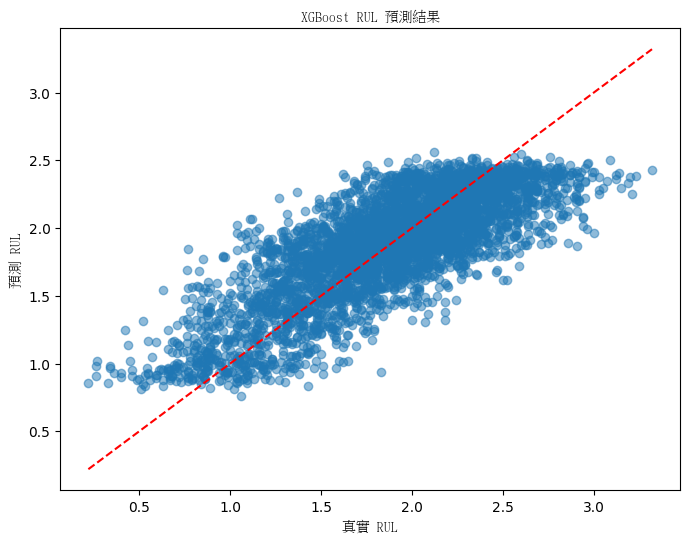

In [14]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 設定中文字體
font_path = "/kaggle/input/fontchinese/Open_Data/Fonts/TW-Sung-98_1.ttf"
prop = fm.FontProperties(fname=font_path)

y_pred = best_xgb.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--")  # 理想情況

# 設定標籤與標題的字體
plt.xlabel("真實 RUL", fontproperties=prop)
plt.ylabel("預測 RUL", fontproperties=prop)
plt.title("XGBoost RUL 預測結果", fontproperties=prop)

plt.show()



---

## **4️ CNN（深度學習模型）**
📌 **目標**：使用 **CNN** 預測 RUL  

🔹 **步驟**
1. 設計 CNN 架構  
2. 訓練模型  
3. 評估模型  

📌 **程式碼（TensorFlow/Keras）**


In [15]:
# CNN 資料預處理，窗口化（Sliding Window）
import numpy as np

def create_sequences(X, y, time_steps=5):
    X_seq, y_seq = [], []
    # 確保 y 的索引連續
    y = y.reset_index(drop=True) if hasattr(y, "reset_index") else y
    for i in range(len(X) - time_steps):
        X_seq.append(X[i: i + time_steps])
        y_seq.append(y[i + time_steps])
    return np.array(X_seq), np.array(y_seq)

# 如果 X_train 和 X_test 是 DataFrame，將其轉換為 NumPy 陣列
X_train = X_train.to_numpy() if hasattr(X_train, 'to_numpy') else X_train
X_test = X_test.to_numpy() if hasattr(X_test, 'to_numpy') else X_test

time_steps = 10  # 窗口大小
X_train_seq, y_train_seq = create_sequences(X_train, y_train, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, time_steps)

# 確保輸入形狀正確 (樣本數, 時間步長, 特徵數)
print(X_train_seq.shape, X_test_seq.shape)  # (樣本數, 10, 特徵數)


(16494, 10, 38) (4117, 10, 38)


In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [17]:
# CNN模型架構
# 定義 CNN 模型

model = Sequential([
    Conv1D(256, kernel_size=5, activation='relu', padding='same', input_shape=(time_steps, X_train_seq.shape[2])),
    Conv1D(128, kernel_size=3, activation='relu', padding='same'),
    Conv1D(64, kernel_size=3, activation='relu', padding='same'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])


# 編譯模型
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])

# 顯示模型結構
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 10, 256)             │          48,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 10, 128)             │          98,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 10, 64)              │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 640)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 262,337 (1.00 MB)

 Trainable params: 262,337 (1.00 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# 訓練 CNN
history = model.fit(
    X_train_seq, y_train_seq,
    epochs=50, batch_size=32,
    validation_data=(X_test_seq, y_test_seq),
    verbose=1
)


Epoch 1/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 22426.9551 - mae: 43.7498 - val_loss: 20.8916 - val_mae: 4.5101
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 17.8139 - mae: 2.9282 - val_loss: 0.4488 - val_mae: 0.5227
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 12.9112 - mae: 2.6959 - val_loss: 0.7008 - val_mae: 0.6748
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 30.9145 - mae: 3.1417 - val_loss: 0.6612 - val_mae: 0.6831
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 149.1637 - mae: 4.0532 - val_loss: 0.4345 - val_mae: 0.5326
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 1.0792 - mae: 0.8097 - val_loss: 0.3588 - val_mae: 0.4801
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 1.2598 - mae: 0.8697 - val_loss: 0.3939 - val_mae: 0.5114
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 3.6474 - mae: 1.4395 - val_loss: 0.6513 - val_mae: 0.6587
Epoch 9/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 

In [19]:
# 預測測試集
y_pred_cnn = model.predict(X_test_seq)

# 計算 MSE、RMSE、R²
mse_cnn = mean_squared_error(y_test_seq, y_pred_cnn)
rmse_cnn = np.sqrt(mse_cnn)
r2_cnn = r2_score(y_test_seq, y_pred_cnn)

# 輸出結果
print(f"CNN 模型的 MSE: {mse_cnn}")
print(f"CNN 模型的 RMSE: {rmse_cnn}")
print(f"CNN 模型的 R²: {r2_cnn}")


129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
CNN 模型的 MSE: 0.24982771600401601
CNN 模型的 RMSE: 0.49982768631200897
CNN 模型的 R²: -0.0003965982290732306


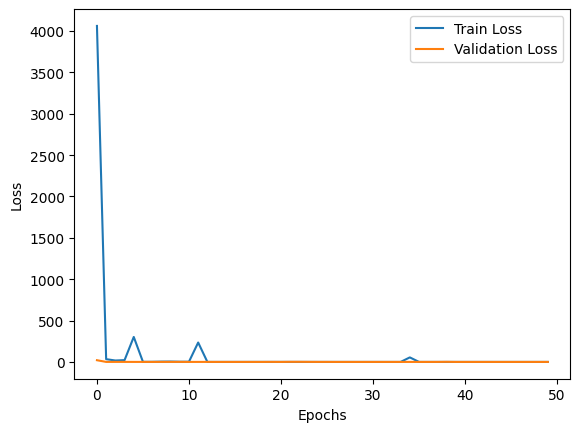

In [20]:
# 觀察 Loss 變化
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



---

## **5️ 模型部署**
📌 **目標**：使用 FastAPI 部署模型  

📌 **程式碼**

In [21]:
!pip install fastapi uvicorn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 3.5 MB/s eta 0:00:00


In [22]:
import joblib

# 儲存最佳 XGBoost 模型
joblib.dump(best_xgb, "xgboost_rul_model.pkl")


['xgboost_rul_model.pkl']

In [23]:
print(X_train.shape)  # (樣本數, 特徵數)


(16504, 38)


In [24]:
print(X_train[:5])  # 查看前 5 筆數據


[[ 5.00540443e-02 -3.01518345e-01  0.00000000e+00  1.41683329e-01
  -5.17146434e-01  8.92434560e-01 -5.23175463e-01  0.00000000e+00
  -4.16233936e-01  1.57999142e-01  1.92549393e-01 -5.57395771e-01
  -2.86517303e-01 -3.46944695e-18  5.09674655e-01  0.00000000e+00
   0.00000000e+00  2.97270835e-01  3.72242865e-01  1.59223800e+03
   1.40968800e+03  1.46200000e+01  2.16100000e+01  5.53136000e+02
   2.38813600e+03  9.05171000e+03  1.30000000e+00  4.74460000e+01
   5.21380000e+02  2.38811600e+03  8.13085200e+03  8.43898000e+00
   3.00000000e-02  3.93400000e+02  2.38800000e+03  1.00000000e+02
   3.88080000e+01  2.33112800e+01]
 [ 5.27953173e-01 -4.48178711e-01  0.00000000e+00  1.41683329e-01
   1.05334938e+00 -1.22072489e+00  6.10762113e-01  0.00000000e+00
  -4.53675772e-01  1.82571544e+00 -9.19841389e-01  5.83321709e-01
  -1.63570208e+00 -3.46944695e-18 -2.07309423e+00  0.00000000e+00
   0.00000000e+00  1.31288428e-01  3.41757384e-01  1.58768200e+03
   1.39916600e+03  1.46200000e+01  2.1610

In [25]:
from fastapi import FastAPI
import joblib
import numpy as np
from pydantic import BaseModel

# 初始化 FastAPI 應用
app = FastAPI()

# 載入已訓練好的 XGBoost 模型
try:
    model = joblib.load("xgboost_rul_model.pkl")
    print("✅ XGBoost 模型已成功載入")
except Exception as e:
    print(f"❌ 無法載入模型: {e}")

# 定義輸入數據格式
class RULInput(BaseModel):
    features: list[float]  # 輸入特徵數據（與訓練時的格式一致）

# 定義 API 路由
@app.post("/predict/")
async def predict_rul(data: RULInput):
    try:
        # 檢查輸入數據長度
        if len(data.features) != 38:
            return {"error": "輸入特徵數量錯誤，應該是 38 個數值"}
            
        # 轉換輸入數據為 numpy 陣列
        input_data = np.array(data.features).reshape(1, -1)
        
        # 進行預測
        prediction = model.predict(input_data)[0]
        
        return {"predicted_RUL": prediction}
    except Exception as e:
        return {"error": str(e)}


✅ XGBoost 模型已成功載入



---

## 6 **簡報**
- 簡報展示進行數據預處理、模型建立、性能評估等。